In [84]:
import pygsp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

from tqdm.auto import tqdm
from grakel.datasets import fetch_dataset

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Introduction

In the previous lectures, we analyzed various types of structured data, such as images, text and audio. In our lectures, we used concepts of signal processing and statistics for analyzing our data (e.g., Fourier transform for images and audio, frequency of terms in a document for texts). With respect signal processing, one can understand signals as functions defined over a fixed grid. For instance, for a time series $\mathbf{X} = [x_{1},\cdots,x_{T}]$ one implicitly assumes $t_{1}, \cdots, t_{i-1}, t_{i}, t_{i+1}, \cdots, t_{T}$,

![](./assets/grid_time_series.png)

Likewise, for an image $I = [I_{ij}]_{i,j=1}^{n,m}$, one can image a grid of pixels $(i,j)$ with $i=1,\cdots,n$ and $j=1,\cdots,m$.

![](./assets/grid_image.png)

The notion unifying these concepts, and generalizing to irregular grids is graph theory, which we cover below.

## The intersection between Data Science and Graphs

- __Node classification:__ Seeks to predict to which class a node belongs to.
- __Node Clustering:__ Seeks to group similar nodes together (e.g., community detection)
- __Node Ranking:__ Seeks to define most relevant nodes (for instance, PageRank by Google).
- __Link Prediction:__ Seeks to predict whether two nodes in a graph will be connected.
- __Graph Classification:__ Seeks to predict a label for a whole graph.

## References

Some contents of this lecture were based on

> Shuman, D. I., Narang, S. K., Frossard, P., Ortega, A., & Vandergheynst, P. (2013). The emerging field of signal processing on graphs: Extending high-dimensional data analysis to networks and other irregular domains. IEEE signal processing magazine, 30(3), 83-98.

> West, D. B. (2001). Introduction to graph theory (Vol. 2). Upper Saddle River: Prentice hall.

> Wei, S., & Zhao, Y. (2022). Graph Learning: A Comprehensive Survey and Future Directions. arXiv preprint arXiv:2212.08966.

## What's Next?

If you're interested on data analysis on graphs, ML on graphs can be the next step. Here are some resources,

> [CS224W: Machine Learning with Graphs](https://web.stanford.edu/class/cs224w/)

> Bronstein, M. M., Bruna, J., Cohen, T., & Veličković, P. (2021). [Geometric deep learning: Grids, groups, graphs, geodesics, and gauges](https://arxiv.org/pdf/2104.13478.pdf). arXiv preprint arXiv:2104.13478.

# Graph Theory Concepts

__Def.__ A graph $G$ is a pair $(V, E)$ of a vertex set $V$ and an edge set $E$. Elements $v \in V$ are called vertices. An element $e \in E$ is called an edge. For each $e \in E$, $\exists u, v$ s.t. $e = (u, v)$ and $u, v \in V$. The vertices $(u, v)$ are called __endpoints__ of $e$.

In this lecture, we will use [NetworkX](https://networkx.org/) to represent graphs, which was imported in the first cell. To initialize a graph, you use the following,

In [57]:
G = nx.Graph()

here, $G$ is an empty graph. We may add nodes through ```.add_node(v)```,

In [58]:
G.add_node(1)

or by using a list of nodes,

In [59]:
G.add_nodes_from([2, 3, 4, 5])

you may add edges by specifying the pairs $(u, v)$,

In [60]:
G.add_edge(1, 2)

or by specifying a list of tuples,

In [61]:
G.add_edges_from([(3, 4),
                  (5, 2),
                  (5, 1),
                  (3, 2),
                  (2, 2),
                  (4, 2)])

we may visualize nodes and edges through the attributes of $G$,

In [62]:
G.nodes

NodeView((1, 2, 3, 4, 5))

In [63]:
G.edges

EdgeView([(1, 2), (1, 5), (2, 5), (2, 3), (2, 2), (2, 4), (3, 4)])

furthermore we may __draw__ the graph,

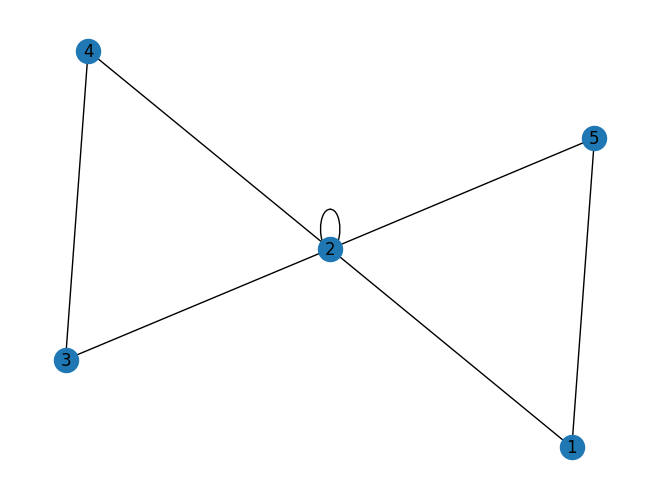

In [64]:
nx.draw(G, with_labels=True)

__Def.__ Let $G = (V, E)$ with $V = \{v_{1},\cdots,v_{n}\}$ and $E = \{e_{1},\cdots,e_{m}\}$. The __adjacency matix__ of $G$ is a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ such that

$$A_{ij} = \begin{cases}
1&\text{ if }\exists e \in E\text{ s.t. }e=(v_{i},v_{j}),\\
0&\text{ otherwise}
\end{cases}$$

i.e., $A_{ij} = 1$ whenever vertices $(v_{i},v_{j})$ are connected.

Furthermore, the __incidence matrix__ is a matrix $\mathbf{M} \in \mathbb{R}^{n \times m}$ s.t.

$$M_{ij} = \begin{cases}
1&\text{ if }v_{i}\text{ is an endpoint of }e_{j},\\
0&\text{ otherwise.}
\end{cases}$$

In [65]:
A = nx.adjacency_matrix(G).toarray()

/tmp/ipykernel_39543/1697451940.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


In [66]:
A

array([[0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0]])

__Def.__ Let $G = (V, E)$ be a graph. The degree of a vertex $v \in V$, written as $d(v)$ is the number of edges incident to $v$.

In [67]:
d1 = A.sum(axis=0)
d2 = A.sum(axis=1)

print(d1, d2)

[2 5 2 2 2] [2 5 2 2 2]


<BarContainer object of 5 artists>

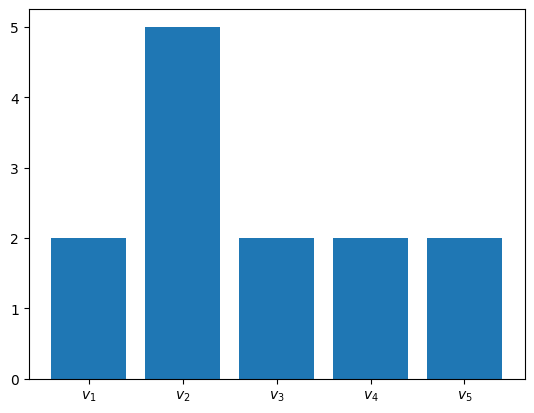

In [71]:
plt.bar(['$v_{' + str(i + 1) + '}$' for i in range(len(G.nodes))], d1)

__Def.__ The neighborhood of an edge $v \in V$ is the set $N(v) = \{u \in V: \exists e \in E\text{ with }e=(u,v)\}$.

__Def.__ A weighted graph $G = (V, E, W)$ is a graph $G = (V, E)$ equipped with a set of weights $W = \{w_{ij}: \exists e \in E\text{ s.t. }e=(v_{i},v_{j})\}$.

# Nearest Neighbors Graph

Let $\mathbf{X} \in \mathbb{R}^{n \times d}$ be a dataset of points in an Euclidean space $\mathbb{R}^{d}$. The nearest neighbor graph $G_{X} = (V, E)$ associated with $\mathbf{X}$ is a graph whose vectices $V = \{v_{1},\cdots,v_{n}\}$ are the datapoints $\mathbf{x}_{i}$, $i=1,\cdots, n$. The edge set $E$ may be defined in various ways. For instance, a k-Nearest Neighbors graph has edges $e = (v_{i}, v_{j})$ whenever $\mathbf{x}_{i}$ is in the set of $k-$nearest neighbors of $\mathbf{x}_{j}$.

In the following we revisit the GTZAN dataset through nearest neighbors graphs,

In [262]:
df = pd.read_csv('../data/gtzan_53fts.csv')

In [263]:
X = df.values[:, 1:-1].astype(np.float32)
c = df.values[:, -1]
c_unique = np.unique(c)
to_numeric = {ci: i for i, ci in enumerate(c_unique)}
to_name = {to_numeric[ci]: ci for ci in to_numeric}

In [264]:
to_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [265]:
y = np.array([to_numeric[ci] for ci in c])

In [266]:
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [267]:
sorted_ind = y.argsort()

X = X[sorted_ind]
y = y[sorted_ind]

In [268]:
D = 1 - ((np.dot(X, X.T)) / (np.linalg.norm(X, axis=1)[:, None] * np.linalg.norm(X, axis=1)[None, :]))

In [269]:
_D = D + 1e+9 * np.eye(X.shape[0])

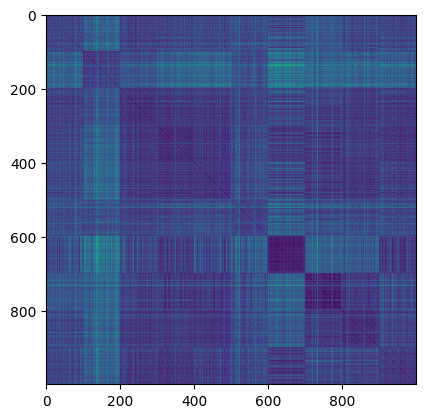

In [270]:
plt.imshow(D)

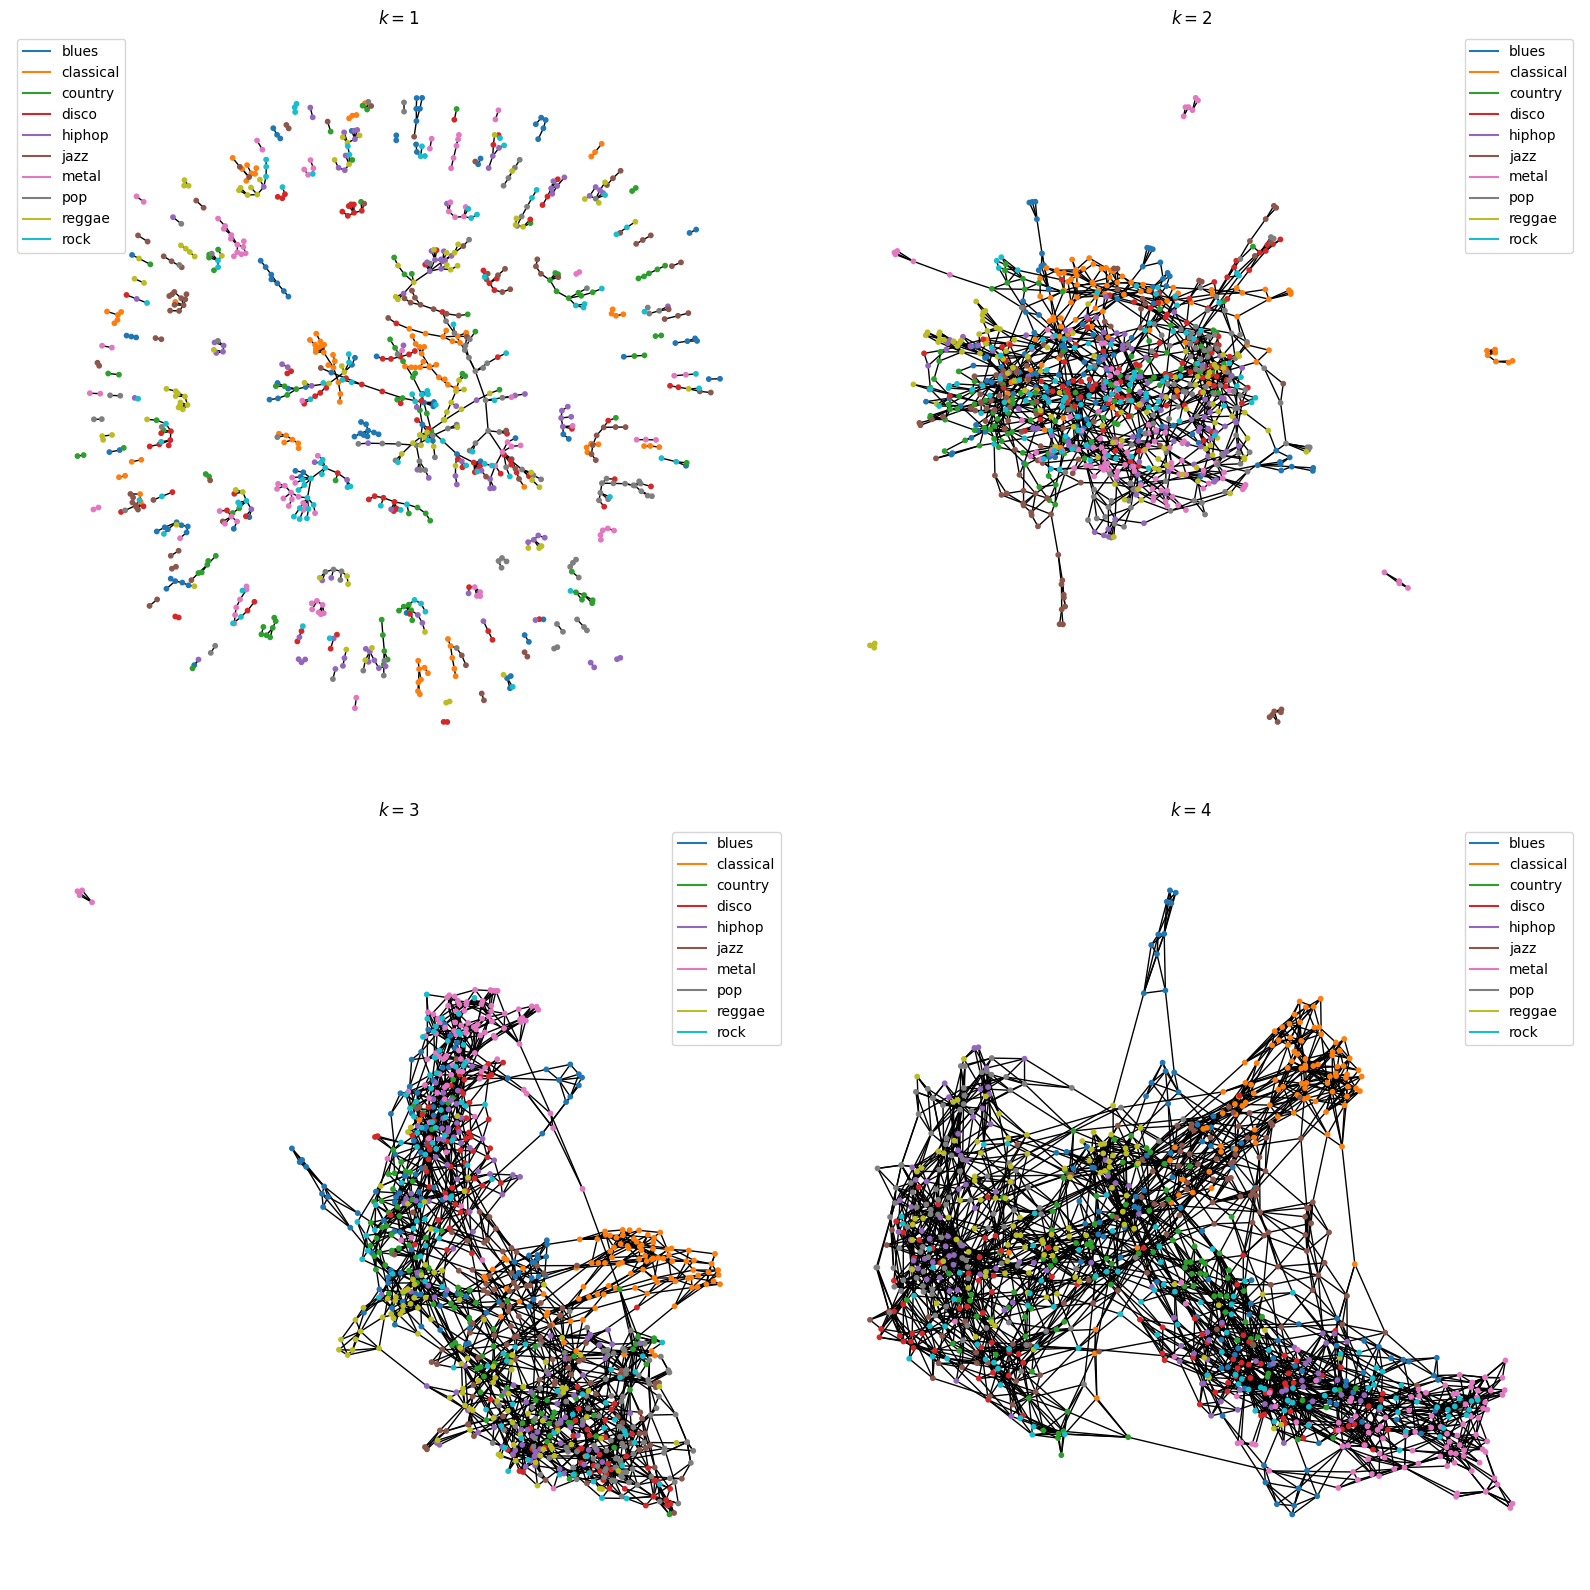

In [271]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for j, k in enumerate([1, 2, 3, 4]):
    ax = axes.flatten()[j]

    G = nx.Graph()
    G.add_nodes_from(np.arange(len(X)))
    
    for i in range(X.shape[0]):
        ind_nneighbors = _D[i, :].argsort()
        G.add_edges_from([(i, j) for j in ind_nneighbors[:k]])
    
    nx.draw(G, node_size=10, node_color=y, cmap=plt.cm.tab10, ax=ax)

    ColorLegend = to_numeric

    cm = plt.get_cmap('tab10')
    cNorm  = colors.Normalize(vmin=0, vmax=max(y))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

    for label in ColorLegend:
        ax.plot([0],[0], color=scalarMap.to_rgba(ColorLegend[label]), label=label)

    ax.set_title('$k = {' + str(k) + '}$')
    ax.axis('off')
    fig.set_facecolor('w')

    ax.legend()

    fig.tight_layout()

we may further visualize the adjacency matrices of the generated graphs

/tmp/ipykernel_39543/794447883.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  ax.spy(nx.adjacency_matrix(G).toarray())


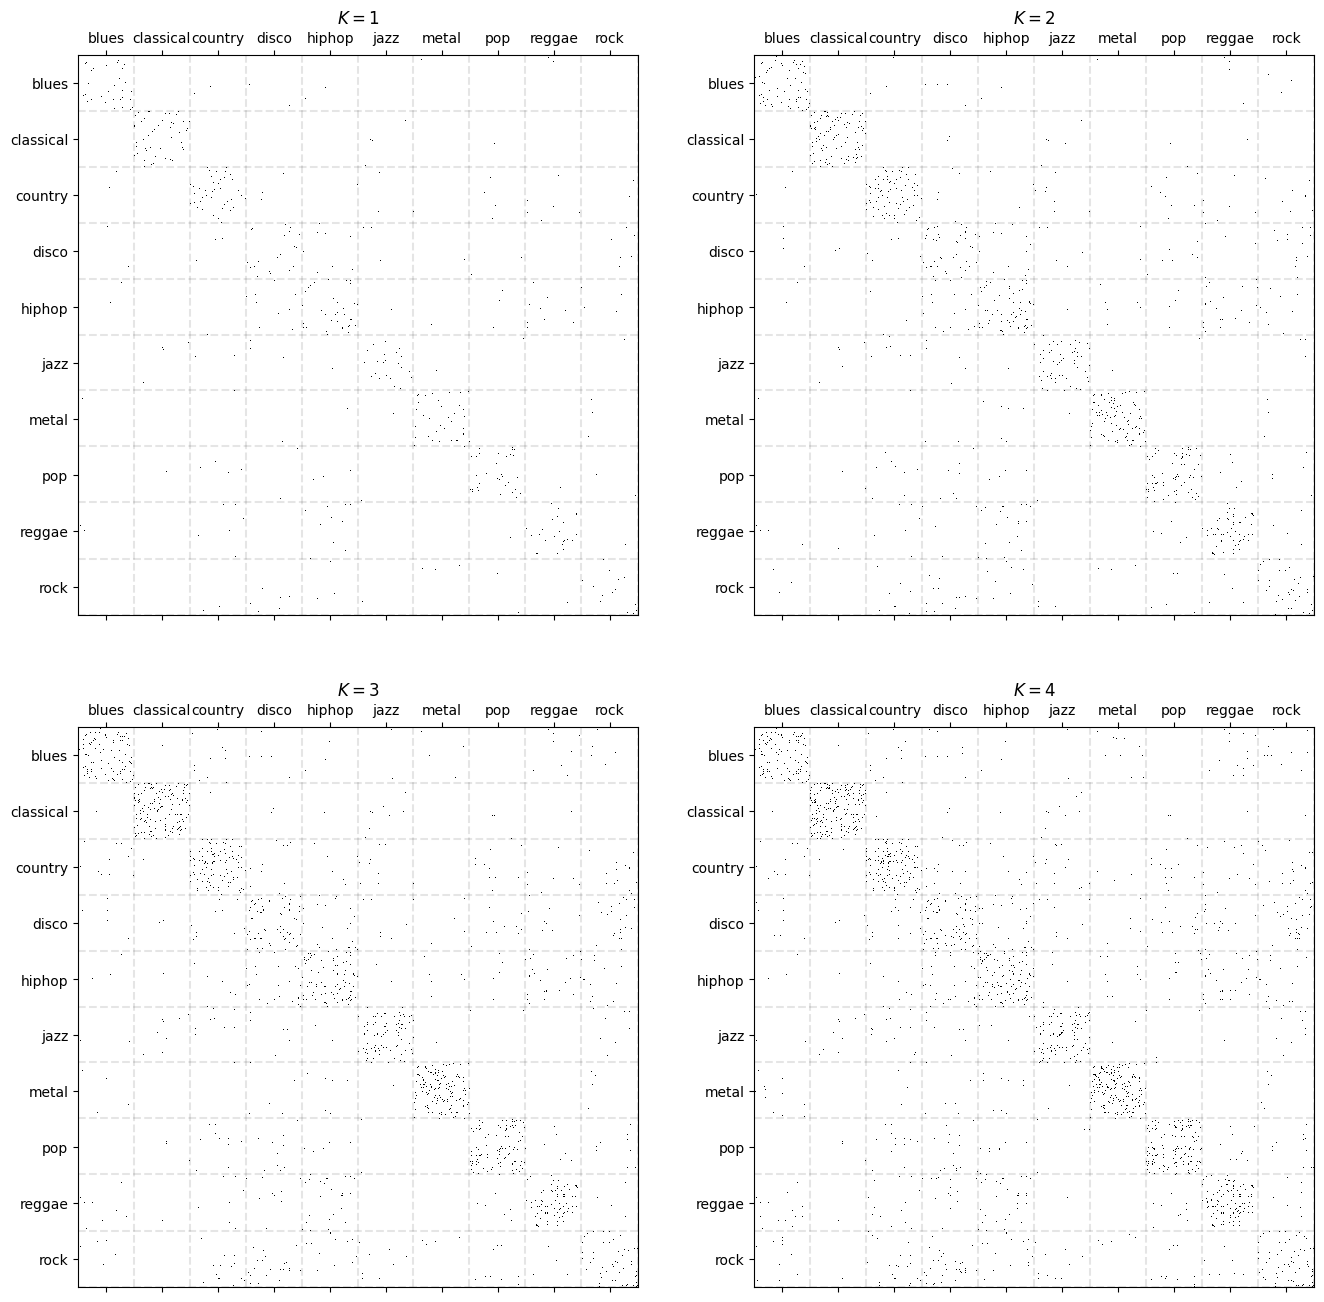

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for j, k in enumerate([1, 2, 3, 4]):
    ax = axes.flatten()[j]

    G = nx.Graph()
    G.add_nodes_from(np.arange(len(X)))
    
    for i in range(X.shape[0]):
        ind_nneighbors = _D[i, :].argsort()
        G.add_edges_from([(i, j) for j in ind_nneighbors[:k]])
    
    # ax.imshow(nx.adjacency_matrix(G).toarray(), cmap='viridis')
    ax.spy(nx.adjacency_matrix(G).toarray())
    
    pts, names = [], []
    for i in range(10):
        ind = np.where(y == i)[0]
        ax.plot([0, X.shape[0]], [ind.max(), ind.max()], 'k--', alpha=0.1)
        ax.plot([ind.max(), ind.max()], [0, X.shape[0]], 'k--', alpha=0.1)
        pts.append((ind.max() + ind.min()) / 2)
        names.append(to_name[i])
    ax.set_xticks(pts, names)
    ax.set_yticks(pts, names)
    ax.set_xlim([0, X.shape[0]])
    ax.set_ylim([X.shape[0], 0])
    
    ax.set_title('$K = {' + str(k) + '}$')

# Functions over Graphs

__Def.__ A function $f$ over a graph $G = (V, E)$ maps each $v \in V$ to a vector in $\mathbb{R}^{d}$. In other others, $f:V\rightarrow\mathbb{R}^{d}$.

Henceforth, we will assume $d = 1$ for simplicity.

## Graph Laplacian

__Def.__ Let $G = (V, E)$ be a graph. The Laplacian matrix $\mathbf{L} \in \mathbb{R}^{n \times n}$ is a squared matrix defined by,

$$
L_{ij} = \begin{cases}
d(v_{i}) & \text{ if }i=j,\\
-1 & \text{ if } v_{i} \in N(v_{j}),\\
0 & \text{ otherwise}\\
\end{cases}
$$

Let $\mathbf{d} = [d(v_{1}), d(v_{2}), \cdots, d(v_{n})] \in \mathbb{R}^{n}$ be the vector of node degrees. The Graph Laplacian is expressed in matricial form as,

$$\mathbf{L} = \mathbf{D} - \mathbf{A}$$

Henceforth we will use the normalized version of the Graph laplacian, namely,

$$\mathbf{L} = \mathbf{I} - (\mathbf{D}^{+})^{1/2}\mathbf{A}(\mathbf{D}^{+})^{1/2}$$

that is,

$$\mathbf{L} = \begin{cases}
1 & \text{ if } i = j\\
-\dfrac{1}{\sqrt{d(v_{i})d(v_{j})}} & \text{ if } i \neq j\text{ and }v_{i} \in N(v_{j}),\\
0 & \text{ otherwise}
\end{cases}$$

## Graph Fourier Transform (GFT)

Now, recall that the 1-D Fourier transform is given by,

$$F(\omega) = \langle f, e^{2\pi i \omega t} \rangle = \int_{\mathbb{R}}f(t)e^{-2\pi i \omega t}dt$$

where $\langle f, u \rangle = \int_{\mathbb{R}} f(t)u^{*}(t)dt$ is an inner product between functions. As such, the Fourier transform has an interesting interpretation: $F(\omega)$ is the inner product of $f(t)$ with $u(t,\omega) = e^{2\pi i \omega t}$. Now, note that $u(t, \omega)$ is an Eigenfunction of the (one-dimensional) Laplace operator,

$$-\Delta u(t, \omega) = -\dfrac{\partial^{2} u}{\partial t^{2}} = (2\pi \omega)^{2}e^{2\pi i \omega t}$$

If we approximate $f$ empirically with $[t_{\ell}]_{\ell=1}^{n}$ and $\omega = [\omega_{j}]_{j=1}^{m}$, we have $\hat{f}(t) = \sum_{\ell=1}^{n}f(v_{\ell})\delta(t - t_{\ell})$ and $\hat{u}(t, \omega) = \sum_{\ell=1}^{n}\sum_{j=1}^{m}\omega(t_{\ell}, \omega_{j})\delta((t, \omega) - (t_{\ell},\omega_{j}))$, so that,

$$\hat{F}(\omega_{j}) = \langle f, u \rangle = \int_{\mathbb{R}}\hat{f}(t)\hat{u}^{*}(t, \omega_{j})dt$$
$$\hat{F}(\omega_{j}) = \sum_{\ell=1}^{n}f(t_{\ell})u^{*}(t_{\ell}, \omega_{j}) $$

where $\omega_{j}$ is the $j-th$ eigenvalue of the Laplacian $\Delta$. Note that we may express the latter expression in matricial form,

$$\mathbf{F} = \mathbf{fU}$$

where $\mathbf{f} \in \mathbb{R}^{n}$ and is an unitary matrix $\mathbf{U} = \mathbb{R}^{n \times m}$.

__Def.__ Given a graph $G = (V, E)$ and a function $f:V\rightarrow\mathbb{R}$, with $\mathbf{f} \in \mathbb{R}^{n}$, the graph Fourier transform $\mathbf{F} \in \mathbb{R}^{n}$ is defined as,

$$\mathbf{F} = \mathbf{fU}$$

where $\mathbf{U} \in \mathbb{R}^{n \times n}$ is the matrix of eigenvectors of the normalized Laplacian $\mathbf{L} = \mathbf{UDU}^{T}$

in this example, we are going to analyze a function defined over a 3D grid. Like the past example, we are handed a dataset $\mathbf{X} \in \mathbb{R}^{n \times d}$, except that, this time, $d = 3$. Such dataset can be understood as a __point cloud__ in $\mathbb{R}^{3}$.

__Connection with the Continuous Laplacian.__ In previous lectures, we saw that,

$$\Delta u = \frac{\partial^{2} u}{\partial x_{1}^{2}} + \cdots + \frac{\partial^{2} u}{\partial x_{d}^{2}}$$

Using finite-differences, this operator is expressed as,

$$(u_{k,i+1,j}+u_{k,i,j+1}-4u_{k,i,j}+u_{k,i-1,j}+u_{k,i,j-1})$$

which corresponds to the (negative) Graph laplacian if we interpret the grid as a graph with $V = \{(i, j):i=1,\cdots,h;j=1,\cdots,w\}$ and $E = \{(u,v): \forall (u,v) \in V\text{ s.t. }\lVert u - v \rVert_{1} = 1\}$. In other words, the Graph laplacian generalizes the usual notion of Laplacian to irregular grids.

In [115]:
bunny = np.load('../data/bunny.npy')

(-0.8069176187808327,
 1.0515953978561365,
 -0.7468885477024634,
 1.0939794050004439)

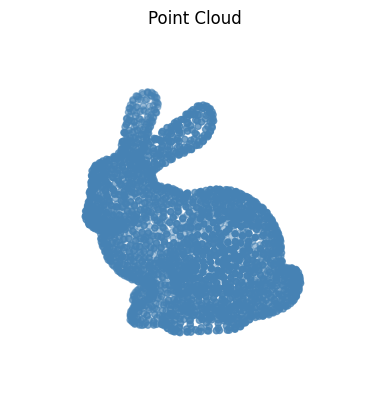

In [273]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], c='steelblue')
ax.set_title('Point Cloud')
ax.view_init(60, 60, 60 + 90)
ax.axis('off')

now, we define the $k-$Nearest Neighbors graph for our point cloud,

In [274]:
G = nx.Graph()
G.add_nodes_from(np.arange(len(bunny)))
D = (((bunny[:, None, :] - bunny[None, :, :])) ** 2).sum(axis=-1)
_D = D + 1e+9 * np.eye(bunny.shape[0])

k = 5
for i in range(bunny.shape[0]):
    ind_nneighbors = _D[i, :].argsort()
    G.add_edges_from([(i, j) for j in ind_nneighbors[:k]])

In [275]:
edge_xyz = np.array([(bunny[u], bunny[v]) for u, v in G.edges()])

In [276]:
len(edge_xyz)

7086

We can visualize the edges connecting the points to get a feel of the 5-NN graph,

(-0.8069176187808327,
 1.0515953978561365,
 -0.7468885477024634,
 1.0939794050004439)

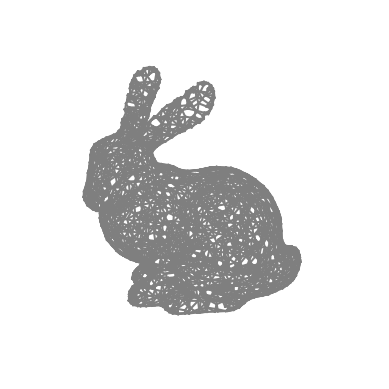

In [278]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], alpha=0.0)
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")
ax.view_init(60, 60, 60 + 90)
ax.axis('off')

Now, we are going to define a function over this grid. We will use the following function,

$$f(\mathbf{x}) = \begin{cases}
20 & \text{ if } \lVert\mathbf{x} - \mathbf{x}_{0}\rVert_{2} \leq 0.5,\\
0 & \text{ otherwise }
\end{cases}$$

In [310]:
x_0 = bunny[20, :]
print(x_0)

[-0.24181131  0.69170187  0.00375571]


In [331]:
def my_signal(x, x_0):
    if np.linalg.norm(x - x_0) <= 0.5:
        return 20
    else:
        return 0

In [332]:
f = np.array([my_signal(x, x_0) for x in bunny])

__Note.__ We may visualize the function over $G$ by scattering the nodes of the graph (i.e. $\mathbf{x}_{i} \in \mathbb{R}^{3}$) over $\mathbb{R}^{3}$, and coloring the points by the values of the function,

(-0.8069176187808327,
 1.0515953978561365,
 -0.7468885477024634,
 1.0939794050004439)

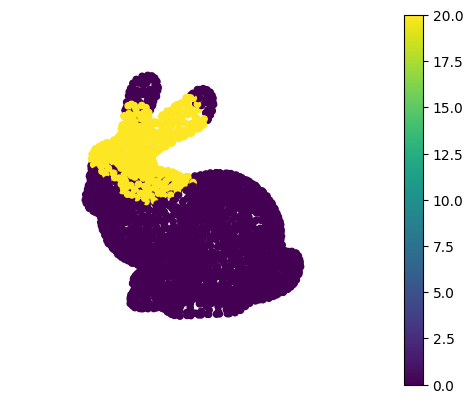

In [336]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sca = ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], c=f, cmap=plt.cm.viridis, alpha=1)
ax.view_init(60, 60, 60 + 90)
fig.colorbar(sca)
ax.axis('off')

Next, we're going to solve the heat equation for $f$ defined over $G$, in a similar way as we done in Lecture 8. Remember, the heat equation is defined as,

$$\dfrac{\partial u}{\partial t} = \alpha\Delta u$$

As we said earlier, this can be translated into a graph as,

$$\dfrac{\partial u}{\partial t} + \alpha L u = 0$$

as a result, applying finite differences we may iterate $u_{k+1, \ell} = u_{k,\ell} - \alpha\sum_{j=1}^{n}L_{\ell,j}u_{k,j}$

In [317]:
d = np.array([G.degree(u) for u in G.nodes])

# L = D - A
L = np.diag(d) - nx.adjacency_matrix(G).toarray()

# norm_L = Id - D^{-1/2}AD^{-1/2} = D^{-1/2}LD^{-1/2}
norm_L = np.dot(
    np.diag(1 / d) ** (1 / 2),
    np.dot(L, np.diag(1 / d) ** (1 / 2))
)

/tmp/ipykernel_60698/348626741.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = np.diag(d) - nx.adjacency_matrix(G).toarray()


In [318]:
f.shape, norm_L.shape

((2503,), (2503, 2503))

In [319]:
hist = []
f_it = f.copy()
for i in range(200):
    f_it = f_it - 0.25 * np.dot(norm_L, f_it)
    hist.append(f_it)

(-0.8069176187808327,
 1.0515953978561365,
 -0.7468885477024634,
 1.0939794050004439)

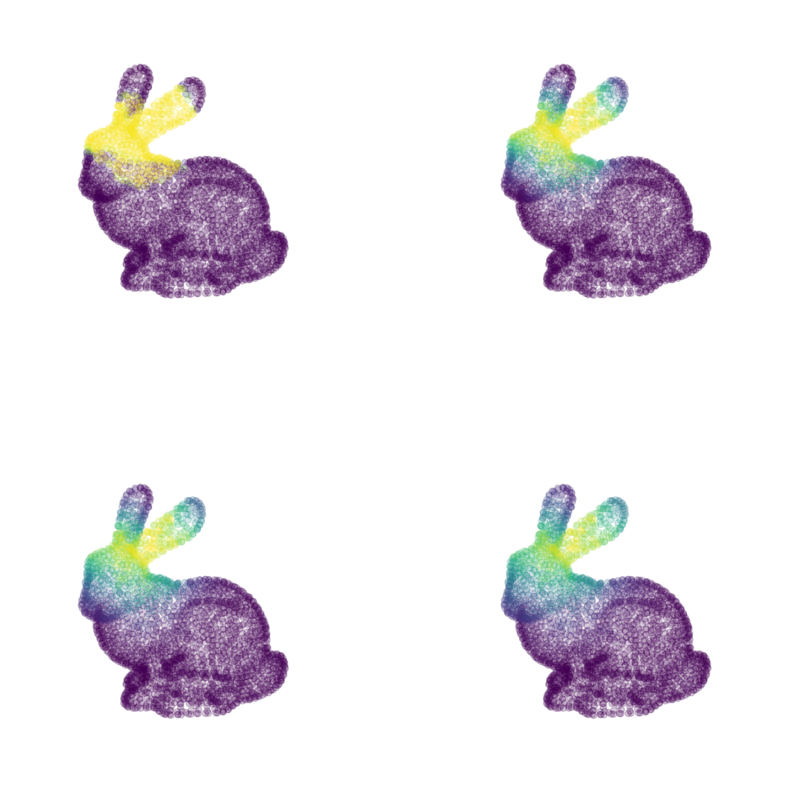

In [320]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(221, projection='3d')
sca = ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], c=hist[0],
                 cmap=plt.cm.viridis, alpha=0.2, vmin=0., vmax=20.)
ax.view_init(60, 60, 60 + 90)
ax.axis('off')

ax = fig.add_subplot(222, projection='3d')
sca = ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], c=hist[66],
                 cmap=plt.cm.viridis, alpha=0.2, vmin=0., vmax=20)
ax.view_init(60, 60, 60 + 90)
ax.axis('off')

ax = fig.add_subplot(223, projection='3d')
sca = ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], c=hist[133],
                 cmap=plt.cm.viridis, alpha=0.2, vmin=0., vmax=20)
ax.view_init(60, 60, 60 + 90)
ax.axis('off')

ax = fig.add_subplot(224, projection='3d')
sca = ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], c=hist[199],
                 cmap=plt.cm.viridis, alpha=0.2, vmin=0., vmax=20)
ax.view_init(60, 60, 60 + 90)
ax.axis('off')

Next, we want to do the same idea, but in the frequency domain. We start by calculating the Graph Fourier Transform of $f$ over $G$,

In [313]:
def gft(G, f):
    """Computes the Graph Fourier Transform (GFT) of a signal f defined
    over a graph.
    
    Parameters
    ----------
    G : networkx graph
        Graph defined through NetworkX library.
    f : np.ndarray
        NumPy array of shape (n,) where n is the
        number of nodes in G.
    """
    # Vector of node degrees
    d = np.array([G.degree(u) for u in G.nodes])

    # L = D - A
    L = np.diag(d) - nx.adjacency_matrix(G).toarray()

    # norm_L = Id - D^{-1/2}AD^{-1/2} = D^{-1/2}LD^{-1/2}
    norm_L = np.dot(
        np.diag(1 / d) ** (1 / 2),
        np.dot(L, np.diag(1 / d) ** (1 / 2))
    )

    # Spectrum of normalized Laplacian
    eigvals, eigvecs = np.linalg.eig(norm_L)
    
    return np.dot(f, np.conjugate(eigvecs))

In [338]:
F = gft(G, f)

/tmp/ipykernel_60698/916560823.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = np.diag(d) - nx.adjacency_matrix(G).toarray()


(-0.8069176187808327,
 1.0515953978561365,
 -0.7468885477024634,
 1.0939794050004439)

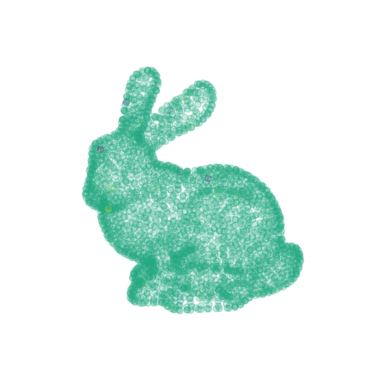

In [325]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2],
           c=F, cmap=plt.cm.viridis, alpha=0.25)
ax.view_init(60, 60, 60 + 90)
ax.axis('off')

We can verify that the inverse Fourier transform of $F$ gives us $f$ back,

In [314]:
def igft(G, F):
    """Computes the Inverse Graph Fourier Transform (IGFT) of a
    GFT F defined over a graph G.
    
    Parameters
    ----------
    G : networkx graph
        Graph defined through NetworkX library.
    F : np.ndarray
        NumPy array of shape (n,) where n is the
        number of nodes in G.
    """
    # Vector of node degrees
    d = np.array([G.degree(u) for u in G.nodes])

    # L = D - A
    L = np.diag(d) - nx.adjacency_matrix(G).toarray()

    # norm_L = Id - D^{-1/2}AD^{-1/2} = D^{-1/2}LD^{-1/2}
    norm_L = np.dot(
        np.diag(1 / d) ** (1 / 2),
        np.dot(L, np.diag(1 / d) ** (1 / 2))
    )

    # Spectrum of normalized Laplacian
    eigvals, eigvecs = np.linalg.eig(norm_L)
    
    return np.dot(eigvecs, F)

/tmp/ipykernel_60698/3074016669.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = np.diag(d) - nx.adjacency_matrix(G).toarray()


(-0.8069176187808327,
 1.0515953978561365,
 -0.7468885477024634,
 1.0939794050004439)

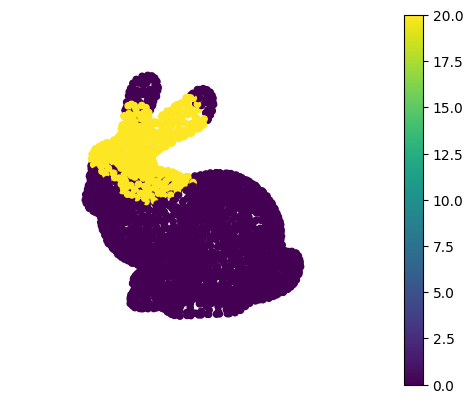

In [341]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sca = ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2], c=igft(G, F), cmap=plt.cm.viridis, alpha=1)
ax.view_init(60, 60, 60 + 90)
fig.colorbar(sca)
ax.axis('off')

Next, we want to filter the signal defined over $G$ by filtering in the frequency domain. Note that $F(\omega)$ is defined over eigenvalues of $L$, i.e., $F_{j} = F(\lambda_{j})$, where $\lambda_{j}$ is the j-th eigenvalue of $L$. We start with the spectrum of $L$,

In [343]:
eigvals, eigvecs = np.linalg.eig(L)

In [344]:
sorted_ind = eigvals.argsort()

we define our filter as,

$$H(\lambda_{j}) = exp\biggr{(}-\beta \frac{\lambda_{j}}{\text{max}_{k}\lambda_{k}}\biggr{)}$$

In [349]:
scale = 100
H = np.exp(- scale * eigvals / eigvals.max())

Text(0, 0.5, '$F(\\lambda_{j})$')

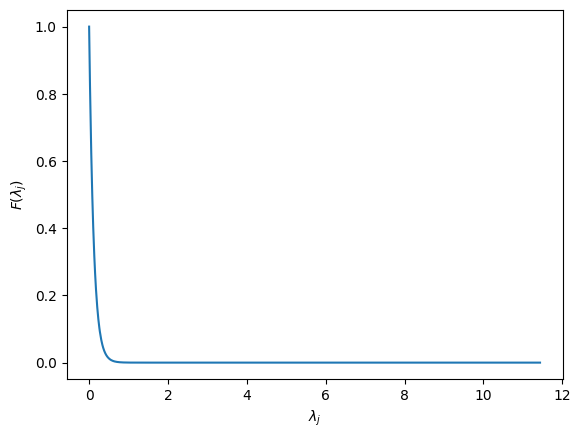

In [350]:
plt.plot(eigvals[sorted_ind], H[sorted_ind])
plt.xlabel('$\lambda_{j}$')
plt.ylabel('$F(\lambda_{j})$')

In [351]:
F.shape, H.shape

((2503,), (2503,))

In [352]:
filtered_f = igft(G, (H * F))

/tmp/ipykernel_60698/3074016669.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  L = np.diag(d) - nx.adjacency_matrix(G).toarray()


(-0.8069176187808327,
 1.0515953978561365,
 -0.7468885477024634,
 1.0939794050004439)

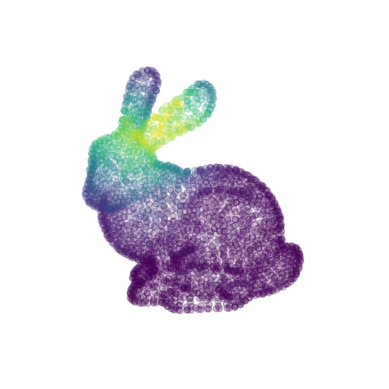

In [353]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bunny[:, 0], bunny[:, 1], bunny[:, 2],
           c=filtered_f, cmap=plt.cm.viridis, alpha=0.25, vmin=0.0, vmax=20)
ax.view_init(60, 60, 60 + 90)
ax.axis('off')